In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

sns.set_theme()
sns.set_context('notebook')

## 数据预处理

In [2]:
# 读取数据
df=pd.read_csv("taobao.csv")
df

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21
...,...,...,...,...,...,...
12256901,93812622,378365755,1,95q6d6a,11,2014-12-13 21
12256902,93812622,177724753,1,NaN,12311,2014-12-14 21
12256903,93812622,234391443,1,NaN,8765,2014-12-11 16
12256904,93812622,26452000,1,95q6dqc,7951,2014-12-08 22


In [3]:
# 查看每列缺失值个数
df.isna().sum()   # 等同于df.isfull().sum()
# 缺失值过多 直接删除
df.drop('user_geohash',axis=1,inplace=True)
# 分割天数和小时
df['date'] = df['time'].str[0:10]
df['hour'] = df['time'].str[11:]
df

,user_id,item_id,behavior_type,item_category,time,date,hour
0,98047837,232431562,1,4245,2014-12-06 02,2014-12-06,02
1,97726136,383583590,1,5894,2014-12-09 20,2014-12-09,20
2,98607707,64749712,1,2883,2014-12-18 11,2014-12-18,11
3,98662432,320593836,1,6562,2014-12-06 10,2014-12-06,10
4,98145908,290208520,1,13926,2014-12-16 21,2014-12-16,21
...,...,...,...,...,...,...,...
12256901,93812622,378365755,1,11,2014-12-13 21,2014-12-13,21
12256902,93812622,177724753,1,12311,2014-12-14 21,2014-12-14,21
12256903,93812622,234391443,1,8765,2014-12-11 16,2014-12-11,16
12256904,93812622,26452000,1,7951,2014-12-08 22,2014-12-08,22


# 数据分析 & 可视化

流量分析 
日访问量(PV) 日独立访问量(UV)

In [4]:
# 日访问量
pv_daily = df.groupby('date')['item_id'].size().reset_index(name='pv')
pv_daily.head(5)

,date,pv
0,2014-11-18,366701
1,2014-11-19,358823
2,2014-11-20,353429
3,2014-11-21,333104
4,2014-11-22,361355


In [5]:
uv_daily = df.groupby('date')['user_id'].nunique().reset_index(name='uv')
uv_daily.head()

,date,uv
0,2014-11-18,6343
1,2014-11-19,6420
2,2014-11-20,6333
3,2014-11-21,6276
4,2014-11-22,6187


可视化结果展示

Text(0.5, 1.0, 'uv_daily')

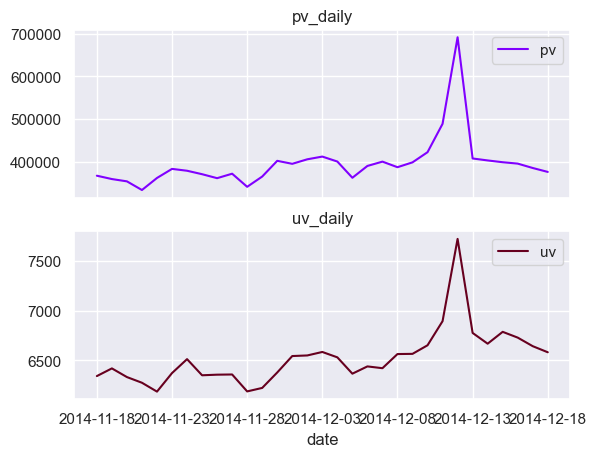

In [6]:
fig, axes = plt.subplots(2,1,sharex=True)
pv_daily.plot(x='date',y='pv',ax=axes[0],colormap='rainbow')
uv_daily.plot(x='date',y='uv',ax=axes[1],colormap='RdGy')
axes[0].set_title('pv_daily')
axes[1].set_title('uv_daily')

有图象得出结论 ，12.12 人最多 为什么呢 ，因为有双12

小时访问量 & 小时独立访问量

In [7]:
pv_hour = df.groupby('hour')['user_id'].size().reset_index(name='pv')
pv_hour.head()

,hour,pv
0,00,517404
1,01,267682
2,02,147090
3,03,98516
4,04,80487


In [8]:
uv_hour = df.groupby('hour')['user_id'].nunique().reset_index(name='uv')
uv_hour.head()

,hour,uv
0,00,5786
1,01,3780
2,02,2532
3,03,1937
4,04,1765


Text(0.5, 1.0, 'uv_hour')

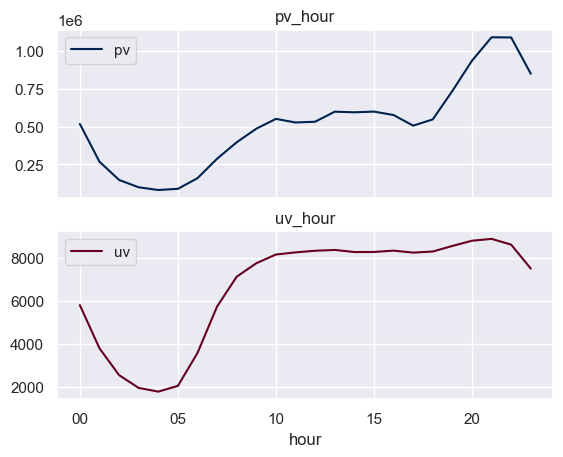

In [9]:
# 可视化
fig,axes = plt.subplots(2,1,sharex=True)
# pv_hour.plot()
pv_hour.plot(x='hour',y='pv',ax=axes[0],colormap='cividis')
uv_hour.plot(x='hour',y='uv',ax=axes[1],colormap='RdGy')
axes[0].set_title('pv_hour')
axes[1].set_title('uv_hour')

由图可以看出 uv,pv的峰值出现在8点，说明下班后进行了使用，用户大部分都是上班族，10点之后便没有出现大的浮动

可以分析一下双12当天的时访问量 & 时独立访问量

In [10]:
data_1212 = df[df['date'] == '2014-12-12']
data_1212.head()

,user_id,item_id,behavior_type,item_category,time,date,hour
13,101260672,212072908,1,10984,2014-12-12 11,2014-12-12,11
20,101781721,19349307,1,1863,2014-12-12 12,2014-12-12,12
54,100684618,94486594,1,10984,2014-12-12 23,2014-12-12,23
69,103802946,190848347,1,5232,2014-12-12 22,2014-12-12,22
95,104811265,354843735,1,10585,2014-12-12 21,2014-12-12,21


In [11]:
# 计算双12的pv uv
pv_hour_1212 = data_1212.groupby('hour')['user_id'].size().reset_index()
pv_hour_1212.head()
uv_hour_1212 = data_1212.groupby('hour')['user_id'].nunique().reset_index()
uv_hour_1212.head()

,hour,user_id
0,00,1569
1,01,811
2,02,411
3,03,255
4,04,211


Text(0.5, 1.0, 'pv_hour')

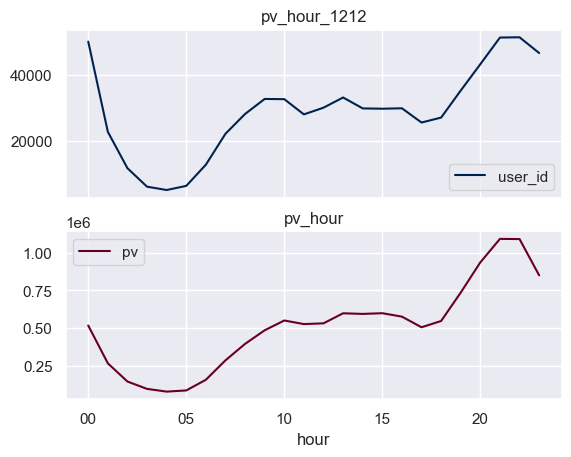

In [12]:
fig,axes = plt.subplots(2,1,sharex=True)
pv_hour_1212.plot(x='hour',y='user_id',ax=axes[0],colormap='cividis')
pv_hour.plot(x='hour',y='pv',ax=axes[1],colormap='RdGy')
axes[0].set_title('pv_hour_1212')
axes[1].set_title('pv_hour')

Text(0.5, 1.0, 'uv_hour')

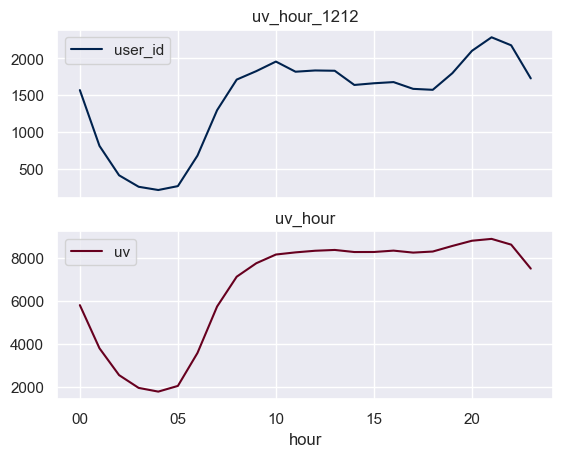

In [13]:
fig,axes = plt.subplots(2,1,sharex=True)
uv_hour_1212.plot(x='hour',y='user_id',ax=axes[0],colormap='cividis')
uv_hour.plot(x='hour',y='uv',ax=axes[1],colormap='RdGy')
axes[0].set_title('uv_hour_1212')
axes[1].set_title('uv_hour')

pv图像变化不算大 uv里面出现了最高点，比以往平均都高，表明淘宝用户在双12那天购物意愿还是很强烈的

In [14]:
# 不同用户行为流量分析
pv_behavior = df.groupby(['behavior_type','hour'])['user_id'].size().reset_index()
pv_behavior.head()

,behavior_type,hour,user_id
0,1,00,487341
1,1,01,252991
2,1,02,139139
3,1,03,93250
4,1,04,75832


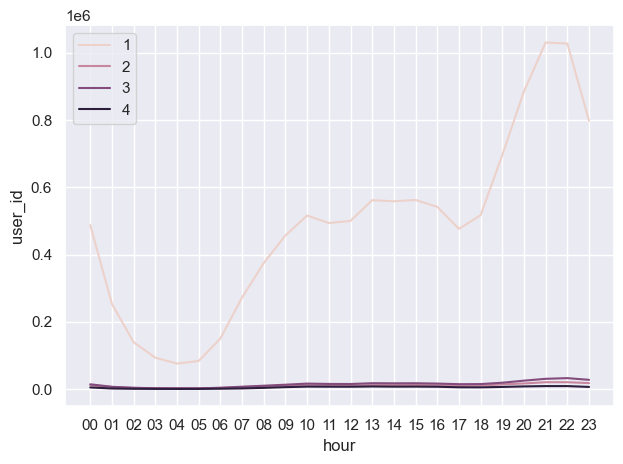

In [15]:
sns.lineplot(data = pv_behavior,x='hour',y='user_id',hue='behavior_type')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

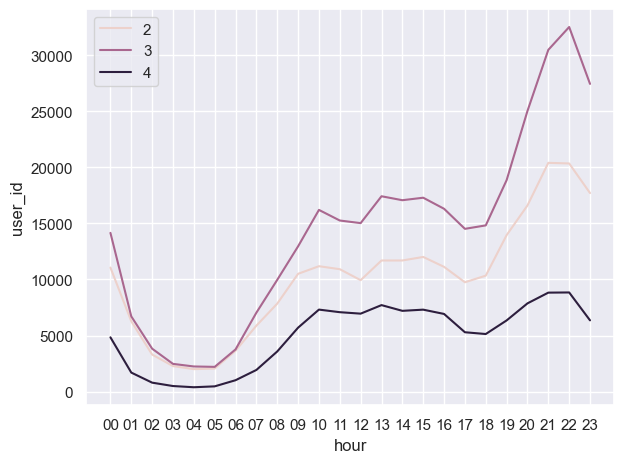

In [16]:
# 去掉点击行为
# 包括浏览、收藏、加购物车、购买，对应取值分别是1、2、3、4
pv_behavior = pv_behavior[pv_behavior['behavior_type']!=1]
pv_behavior
sns.lineplot(data = pv_behavior,x='hour',y='user_id',hue='behavior_type')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

由图像可以看出 6点之后 用户的收藏，购买，加入购物车行为疯狂增长 但是购买力并不算太高
反而是收藏量高，我们可以在这个时候推送优惠卷 ，提高转化率，把收藏 加购 争取变成购买行为

In [17]:
# 双12
pv_1212 = data_1212.groupby(['behavior_type','hour'])['user_id'].size().reset_index()
pv_1212

,behavior_type,hour,user_id
0,1,00,45229
1,1,01,20988
2,1,02,10896
3,1,03,5762
4,1,04,4827
...,...,...,...
91,4,19,577
92,4,20,643
93,4,21,850
94,4,22,985


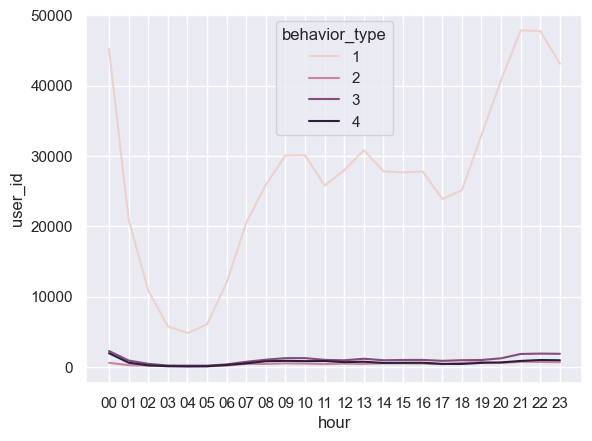

In [18]:
# 可视化
sns.lineplot(data=pv_1212,x='hour',y='user_id',hue='behavior_type')
plt.show()

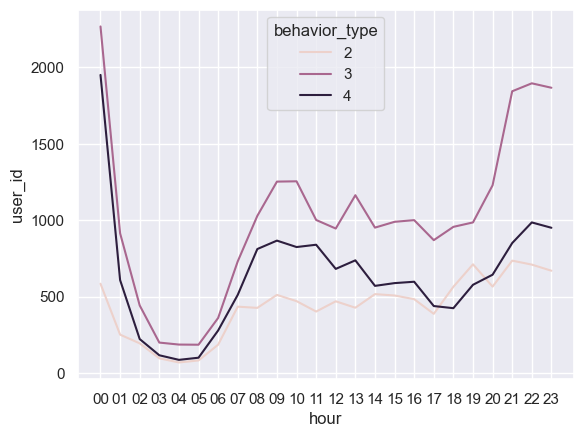

In [19]:
pv_1212 = pv_1212[pv_1212['behavior_type']!=1]
sns.lineplot(data=pv_1212,x='hour',y='user_id',hue='behavior_type')
plt.show()

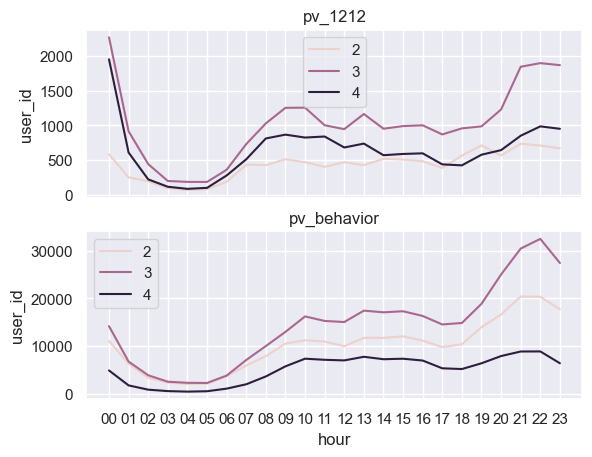

In [20]:
pv_1212 = pv_1212[pv_1212['behavior_type']!=1]
fig,axes=plt.subplots(2,1,sharex=True)
sns.lineplot(data=pv_1212,x='hour',y='user_id',hue='behavior_type',ax=axes[0])
sns.lineplot(data=pv_behavior,x='hour',y='user_id',hue='behavior_type',ax=axes[1])
axes[0].set_title('pv_1212')
axes[1].set_title('pv_behavior')
axes[0].legend(loc='best')
axes[1].legend(loc='best')
plt.show()

In [21]:
# 由用户行为分析来看 在双12当天 用户的购买行为比非常高很多，在早上5点之后，比平时都要高

# 转化率分析

In [22]:
behavior_count = df['behavior_type'].value_counts()
behavior_count
click_num, fav_num, add_num, buy_num = behavior_count

In [23]:
fav_add_num = fav_num+add_num 
print('点击 到 加购/收藏转化率:',fav_add_num/click_num*100)
print('加购/收藏到购买转化率:',buy_num/fav_add_num*100)
print('点击 到 购买转化率:',buy_num/click_num*100)

点击 到 加购/收藏转化率: 5.074376778103197
加购/收藏到购买转化率: 20.508598921722516
点击 到 购买转化率: 1.04068358119821


点击到收藏/加购 的概率为5% , 加购/收藏 到 购买的转化率为 20% 这说明用户对于加购/收藏的还是很大概率买下的
点击到购买转化率只有1%

In [24]:
behavior_count = data_1212['behavior_type'].value_counts()
behavior_count
click_num, fav_num, add_num, buy_num = behavior_count
fav_add_num = fav_num+add_num 
print('点击到加购/收藏转化率:',fav_add_num/click_num*100)
print('加购/收藏到购买转化率:',buy_num/fav_add_num*100)
print('点击 到 购买转化率:',buy_num/click_num*100)

点击到加购/收藏转化率: 6.197749985580828
加购/收藏到购买转化率: 26.273296612087826
点击 到 购买转化率: 1.6283532369872815


点击到收藏/加购 的概率提高了1%，加购/收藏 到购买的概率提高了6%，点击到购买的概率提升了0.6%
说明双12，用户的购物意愿有了非常大的提高

# 用户价值分析

用户购买频次分析

In [25]:
# 只分析购买行为的
df_buy = df[df['behavior_type']==4].groupby('user_id')['behavior_type'].count().reset_index()
df_buy

,user_id,behavior_type
0,4913,6
1,6118,1
2,7528,6
3,7591,21
4,12645,8
...,...,...
8881,142376113,1
8882,142412247,12
8883,142430177,5
8884,142450275,40


<Axes: xlabel='user_id'>

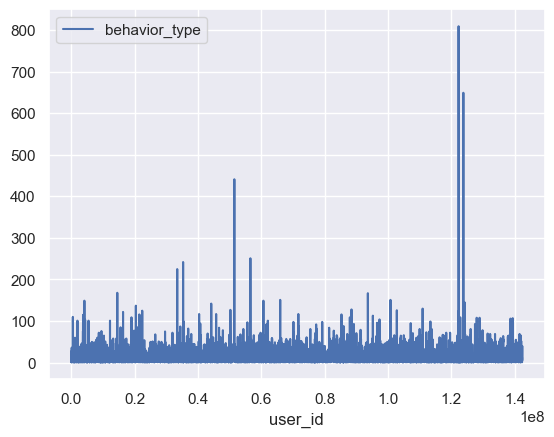

In [26]:
df_buy.plot(x='user_id',y='behavior_type')

可以看出大部分用户的购买次数在0-100之间 甚至有超过800次的 这是忠实用户

df_buy.sort_values('behavior_type',inplace=True,ascending=False)
df_buy.head(10)

前10个忠实用户

# ARPU分析

ARPU = 每日总收益 ÷ 每日总用户数 没有收益 就用每日消费次数代替吧

In [27]:
df_arpu = df.groupby(['date','user_id','behavior_type']).size().reset_index(name='action')
df_arpu.head(5)                                                                           

,date,user_id,behavior_type,action
0,2014-11-18,4913,1,27
1,2014-11-18,4913,2,1
2,2014-11-18,7591,1,4
3,2014-11-18,12645,1,25
4,2014-11-18,54056,1,13


In [28]:
# 计算ARPU 公式 ：ARPU = 每日消费总次数 / 每日活跃总人数
arpu = df_arpu.groupby('date').apply(lambda x:x[x['behavior_type']==4]['action'].sum() / x['user_id'].nunique()).reset_index(name='arpu')
arpu.head(5)

C:\Users\21369\AppData\Local\Temp\ipykernel_41136\1663278169.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  arpu = df_arpu.groupby('date').apply(lambda x:x[x['behavior_type']==4]['action'].sum() / x['user_id'].nunique()).reset_index(name='arpu')


,date,arpu
0,2014-11-18,0.588050
1,2014-11-19,0.574143
2,2014-11-20,0.546660
3,2014-11-21,0.481358
4,2014-11-22,0.577016


Text(0.5, 1.0, 'ARPU')

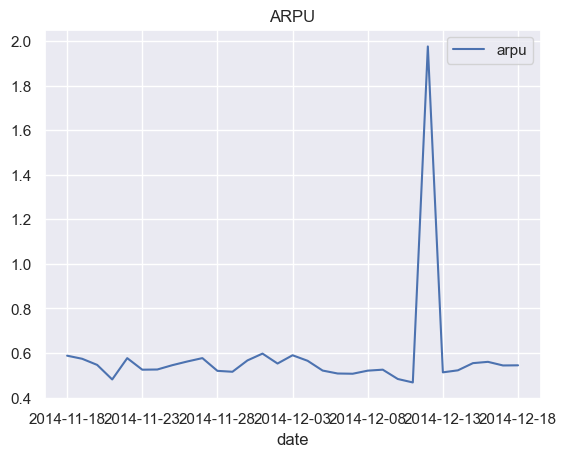

In [29]:
arpu.plot(x='date',y='arpu')
plt.title('ARPU')

每日下单率

In [30]:
order_rate = df_arpu.groupby('date').apply(lambda x:x[x['behavior_type']==4]['user_id'].nunique() / x['user_id'].nunique()).reset_index(name='order_rate')
order_rate.head(5)

C:\Users\21369\AppData\Local\Temp\ipykernel_41136\1196981686.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  order_rate = df_arpu.groupby('date').apply(lambda x:x[x['behavior_type']==4]['user_id'].nunique() / x['user_id'].nunique()).reset_index(name='order_rate')


,date,order_rate
0,2014-11-18,0.242630
1,2014-11-19,0.235358
2,2014-11-20,0.235591
3,2014-11-21,0.211918
4,2014-11-22,0.228059


<Axes: xlabel='date'>

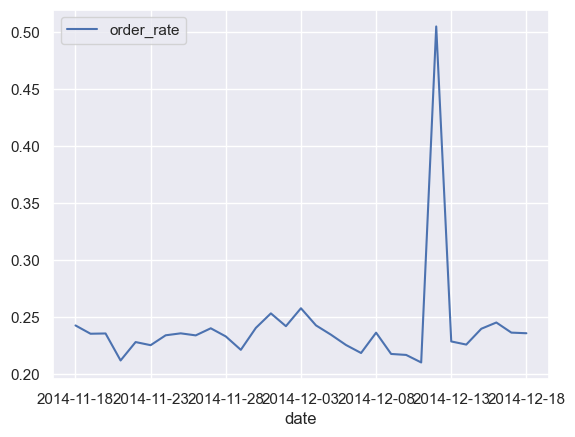

In [31]:
order_rate.plot(x='date',y='order_rate')

活跃用户每天平均消费次数在0.5次左右，双十二期间达到最高值接近2，是平时的4倍左右，表明用户会集中在大促日的时候购买
从下单率来看，双12的下单率是平时的二倍

ARPPU分析

计算方式为：ARPPU = 总收入/活跃用户付费数量。但是在该数据集中没有收益金额，因此我们可以对计算方式做一点转化，将总收入转化为总的购买行为次数。

定义如下：ARPPU = 当日总消费次数/当日活跃用户付费数量

In [32]:
df_arppu = df[df['behavior_type']==4].groupby(['date','user_id'])['behavior_type'].count().reset_index(name='buy_count')
df_arppu.head(5)

,date,user_id,buy_count
0,2014-11-18,54056,1
1,2014-11-18,79824,2
2,2014-11-18,88930,2
3,2014-11-18,247543,5
4,2014-11-18,475826,3


In [33]:
arrpu = df_arppu.groupby('date').apply(lambda x:x['buy_count'].sum()/x['user_id'].count()).reset_index(name='arrpu')
arrpu.head(5)

C:\Users\21369\AppData\Local\Temp\ipykernel_41136\3580569554.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  arrpu = df_arppu.groupby('date').apply(lambda x:x['buy_count'].sum()/x['user_id'].count()).reset_index(name='arrpu')


,date,arrpu
0,2014-11-18,2.423652
1,2014-11-19,2.439444
2,2014-11-20,2.320375
3,2014-11-21,2.271429
4,2014-11-22,2.530120


<Axes: xlabel='date'>

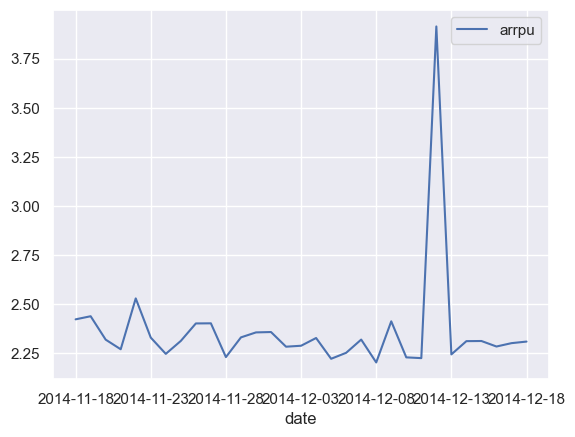

In [34]:
arrpu.plot(x='date',y='arrpu')

平均每日消费次数在2-2.5次之间波动，双十二当天该数值达超过3.75，一个可能的原因是用户会在平时把喜欢的商品进行加购，等到双十二促销当天再下单购买。

# 复购情况分析

复购率 = 复购用户数量 / 有购买行为的用户数量

In [35]:
df_pay = df[df['behavior_type']==4]
df_pay = df_pay.groupby('user_id')['date'].nunique().reset_index(name='count')
df_pay.head()

,user_id,count
0,4913,5
1,6118,1
2,7528,6
3,7591,9
4,12645,4


In [36]:
repeat_buy_ratio = df_pay[df_pay['count']>1]['count'].count()/df_pay['count'].count()
repeat_buy_ratio

np.float64(0.8717083051991897)

在这个月中，复购率为0.87

# 复购周期分析

In [37]:
df_buy = df[df['behavior_type']==4].groupby(['user_id','date'])['behavior_type'].count().reset_index()
df_buy.head(5)

,user_id,date,behavior_type
0,4913,2014-12-01,1
1,4913,2014-12-07,2
2,4913,2014-12-11,1
3,4913,2014-12-13,1
4,4913,2014-12-16,1


In [38]:
df_buy['date'] = pd.to_datetime(df_buy['date'])
df_buy['date_diff_days'] = df_buy.groupby('user_id')['date'].diff(1)
df_buy = df_buy.dropna(subset=['date_diff_days'])
df_buy['date_diff_days'] = df_buy.loc[:,'date_diff_days'].dt.days
df_buy

,user_id,date,behavior_type,date_diff_days
1,4913,2014-12-07,2,6
2,4913,2014-12-11,1,4
3,4913,2014-12-13,1,2
4,4913,2014-12-16,1,3
7,7528,2014-11-26,1,4
...,...,...,...,...
49196,142455899,2014-11-24,1,2
49197,142455899,2014-11-26,2,2
49198,142455899,2014-11-30,1,4
49199,142455899,2014-12-03,1,3


<Axes: xlabel='date_diff_days'>

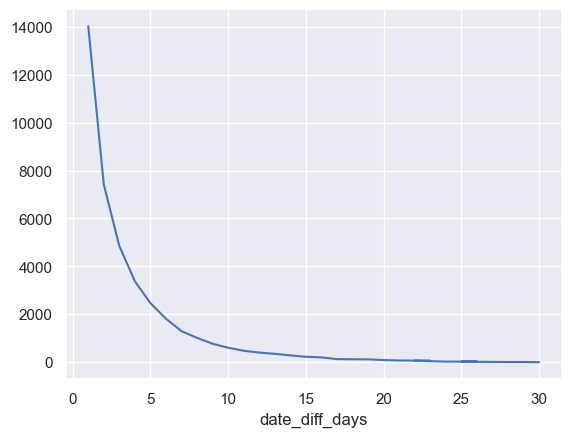

In [39]:
df_buy['date_diff_days'].value_counts().plot()

大部分用户的复购行为发生在5天之内，在第5天复购的行为出现了明显的拐点，如果这个时候采取营销策略提升用户的购买意图，增加更多收益。超过15天后，复购的意愿基本已经趋于0，此时可以考虑采取一些召回策略，增加复购的可能性，防止用户的流失。

## 商品维度分析

In [40]:
item = df.pivot_table(index='item_id',columns='behavior_type',values='user_id',aggfunc='count')
item.columns.name=None
item = item.reset_index()
item.head()

,item_id,1,2,3,4
0,64,2.0,NaN,NaN,NaN
1,496,2.0,NaN,NaN,NaN
2,528,2.0,NaN,NaN,NaN
3,579,2.0,NaN,NaN,NaN
4,581,4.0,NaN,NaN,NaN


In [41]:
# 浏览量最大的前10名
item_click = item.sort_values(1,ascending=False)
item_click[['item_id']].head(10)

,item_id
803231,112921337
694445,97655171
2758493,387911330
960291,135104537
15965,2217535
40785,5685392
911711,128186279
1976225,277922302
100264,14087919
1488679,209323160


In [42]:
# 购买量最多的前10名
item_buy = item.sort_values(4,ascending=False)
item_buy[['item_id']].head(10)

,item_id
2156381,303205878
100264,14087919
818835,115124482
1728268,243091690
1188146,167074648
777261,109259240
909780,127914633
724135,101795752
2661308,374214353
1255692,176556528


In [43]:
# 收藏量最大的前10名
item_click = item.sort_values(2,ascending=False)
item_click[['item_id']].head(10)

,item_id
1976225,277922302
2395708,336964100
2691451,378505512
47968,6703599
941551,132473636
2029340,285375507
707960,99536779
1679435,236236780
771063,108385699
417408,58727293


In [44]:
# 购买次数最多的商品类目
item_category = df.pivot_table(index='item_category',columns='behavior_type',values='user_id',aggfunc='count')
item_category.columns.name=None
item_category = item_category.reset_index()
item_category.head()

,item_category,1,2,3,4
0,2,3.0,NaN,NaN,NaN
1,3,3.0,NaN,NaN,NaN
2,4,1.0,NaN,NaN,NaN
3,6,10.0,NaN,NaN,NaN
4,8,976.0,9.0,4.0,4.0


In [45]:
item_buy = item_category.sort_values(4,ascending=False)
item_buy[['item_category']].head(10)

,item_category
3985,6344
1136,1863
3284,5232
4394,6977
5579,8877
4094,6513
3394,5399
2132,3424
2164,3472
4996,7957


In [59]:
# 日期处理
df['date'] = pd.to_datetime(df['date'])
max_date = df['date'].max()  # 数据集中的最新日期
min_date = df['date'].min()  # 数据集中的最早日期

# 定义流失用户：最近7天没有登录
last_date = max_date - pd.Timedelta(days=7)
user_late_date = df.groupby(['user_id'])['date'].max().reset_index()
user_late_date['是否流失'] = (user_late_date['date'] < last_date).astype(int)


# 特征1：总活跃天数
data1 = df.groupby('user_id')['date'].nunique().reset_index(name='days')

# 特征2：平均每日行为次数
data2 = df.groupby(['user_id','date'])['behavior_type'].count().reset_index()
data2 = data2.groupby('user_id')['behavior_type'].mean().round(0).reset_index()
data2.rename({'behavior_type':'behavior_type_avgcount'},axis=1,inplace=True)

# 特征3：行为类型占比
behavior_counts = df.groupby(['user_id', 'behavior_type']).size().unstack(fill_value=0)
behavior_total = behavior_counts.sum(axis=1)
behavior_ratio_all = behavior_counts.div(behavior_total, axis=0).reset_index()
behavior_ratio_all.columns = ['user_id', 'ratio_1', 'ratio_2', 'ratio_3', 'ratio_4']
data3 = behavior_ratio_all

# 特征4：购买相关特征
data4 = df[df['behavior_type']==4].groupby(['user_id'])['behavior_type'].count().reset_index()
data4.rename({'behavior_type':'buy_count'},axis=1,inplace=True)

# 特征5：最近3天活跃天数
recent_3_date = max_date - pd.Timedelta(days=2)
df_recent3 = df[df['date'] >= recent_3_date]
data5 = df_recent3.groupby('user_id')['date'].nunique().reset_index(name='recent3_days')
data5['recent3_days'] = data5['recent3_days'].fillna(0)  # 未活跃用户填0

# 特征6：活跃趋势
mid_date = min_date + (max_date - min_date) / 2  # 时间中点
df_early = df[df['date'] <= mid_date]  # 前期数据
df_late = df[df['date'] > mid_date]    # 后期数据
data_early = df_early.groupby('user_id')['date'].nunique().reset_index(name='early_days')
data_late = df_late.groupby('user_id')['date'].nunique().reset_index(name='late_days')
data6 = pd.merge(data_early, data_late, on='user_id', how='left').fillna(0)
data6['active_trend_ratio'] = data6['late_days'] / (data6['early_days'] + 1)  # 后期/前期

# 特征7：最近5天活跃天数
recent_5_date = max_date - pd.Timedelta(days=4)
df_recent5 = df[df['date'] >= recent_5_date]
data7 = df_recent5.groupby('user_id')['date'].nunique().reset_index(name='recent5_days')

features = data1.merge(data2, how='left', on='user_id')
features = features.merge(data3, how='left', on='user_id')
features = features.merge(data4, how='left', on='user_id')
features = features.merge(data5, how='left', on='user_id')
features = features.merge(data6, how='left', on='user_id')
features = features.merge(data7, how='left', on='user_id')
# 填充缺失值
X = features.fillna(0)
# 特征8：最近3天 / 最近5天 活跃天数的比值
X['short_long_active_ratio'] = X['recent3_days'] / (X['recent5_days'] + 1)
# 目标变量
y = user_late_date.set_index('user_id')['是否流失']
# 确保特征与目标变量用户ID一致
X = X.set_index('user_id').join(y, how='inner').reset_index()
y = X['是否流失']
X = X.drop('是否流失', axis=1)
X

,user_id,days,behavior_type_avgcount,ratio_1,ratio_2,ratio_3,ratio_4,buy_count,recent3_days,early_days,late_days,active_trend_ratio,recent5_days,short_long_active_ratio
0,4913,29,60.0,0.951780,0.028129,0.016648,0.003444,6.0,3.0,14.0,15.0,1.000000,5.0,0.500000
1,6118,12,10.0,0.957265,0.034188,0.000000,0.008547,1.0,3.0,5.0,7.0,1.166667,5.0,0.500000
2,7528,15,14.0,0.855140,0.004673,0.112150,0.028037,6.0,0.0,9.0,6.0,0.600000,1.0,0.000000
3,7591,25,34.0,0.959255,0.000000,0.016298,0.024447,21.0,3.0,11.0,14.0,1.166667,5.0,0.500000
4,12645,20,13.0,0.925373,0.007463,0.037313,0.029851,8.0,3.0,11.0,9.0,0.750000,5.0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,142376113,12,27.0,0.947205,0.003106,0.046584,0.003106,1.0,2.0,5.0,7.0,1.166667,2.0,0.666667
9996,142412247,25,13.0,0.931343,0.000000,0.032836,0.035821,12.0,1.0,14.0,11.0,0.733333,2.0,0.333333
9997,142430177,27,55.0,0.961512,0.024983,0.010128,0.003376,5.0,3.0,13.0,14.0,1.000000,5.0,0.500000
9998,142450275,31,220.0,0.951459,0.010119,0.032556,0.005866,40.0,3.0,16.0,15.0,0.882353,5.0,0.500000


准确率为: 0.8771693680875783


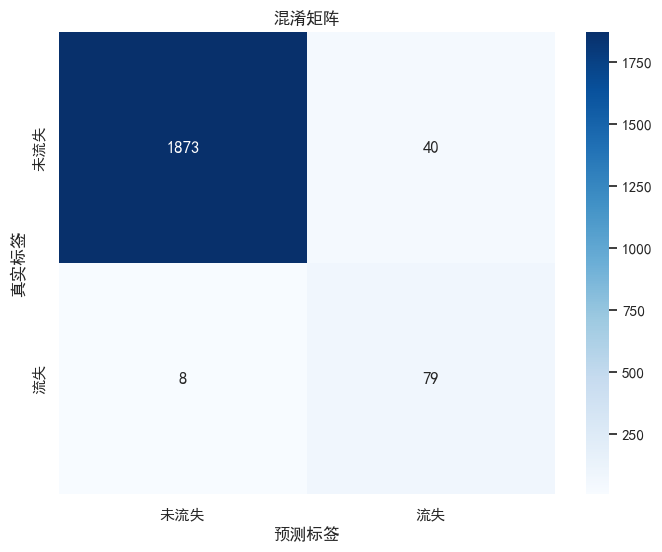

              precision    recall  f1-score   support

         未流失       1.00      0.98      0.99      1913
          流失       0.66      0.91      0.77        87

    accuracy                           0.98      2000
   macro avg       0.83      0.94      0.88      2000
weighted avg       0.98      0.98      0.98      2000

auc指标为: 0.9935558880256683


In [60]:
# 数据集划分
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
# 模型训练：随机森林算法
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier()

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
x_train, y_train = smote.fit_resample(x_train, y_train)

# 模型调优
from sklearn.model_selection  import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5,10,None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf' : [1,2,4]
}

estimator = GridSearchCV(estimator=estimator,param_grid=param_grid,cv=5,n_jobs=-1, scoring='f1_macro')
# 训练模型
estimator.fit(x_train,y_train)
# 模型评估
predict = estimator.predict(x_test)
score = estimator.score(x_test,y_test)
print('准确率为:',score)
# 混淆矩阵
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
plt.figure(figsize=(8,6,),dpi=100)
plt.rcParams["font.family"] = ["SimHei"]
cm = confusion_matrix(y_test,predict) # 第一个是y轴 第二个是x轴
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues',xticklabels=['未流失','流失'],yticklabels=['未流失','流失'])
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('混淆矩阵')
plt.show()
# 精确率和召回率
report= classification_report(y_test,predict,labels=[0,1],target_names=['未流失','流失'])
print(report)
# roc曲线 auc指标
from sklearn.metrics import roc_auc_score
y_pred_proba = estimator.predict_proba(x_test)[:, 1]
auc = roc_auc_score(y_test,y_pred_proba)
print('auc指标为:',auc)

In [61]:
# 假设estimator是训练好的GridSearchCV对象
best_rf = estimator.best_estimator_
feature_importance = pd.DataFrame({
    '特征': X.columns,
    '重要性': best_rf.feature_importances_
}).sort_values('重要性', ascending=False)
print(feature_importance)

                         特征       重要性
12             recent5_days  0.333951
13  short_long_active_ratio  0.189002
8              recent3_days  0.178809
10                late_days  0.074070
1                      days  0.071757
11       active_trend_ratio  0.061634
9                early_days  0.026897
7                 buy_count  0.022673
0                   user_id  0.009047
2    behavior_type_avgcount  0.007846
3                   ratio_1  0.007157
5                   ratio_3  0.006782
6                   ratio_4  0.006013
4                   ratio_2  0.004361
